<a href="https://colab.research.google.com/github/Amanda-Jr/AnaliseDiversidade2022-CursodeDadosPrograMaria/blob/main/An%C3%A1lise_de_Diversidade_2022_Curso_de_Dados_da_PrograMaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Neste notebook, foram explorados os dados coletados da pesquisa anual do Datahackers de 2022. A pesquisa do Datahackers é uma fonte valiosa de informações sobre o mercado de trabalho na área de Tecnologia da Informação(TI) no Brasil, abordando uma ampla gama de tópicos relevantes para profissionais, empresas e instituições de ensino.





**bold text**






# Uso da Biblioteca Pandas





In [ ]:
#Importações:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
dados = pd.read_excel("/content/drive/MyDrive/ProgramariaAnaliseDados/planilha_modulo3.xlsx")

import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

from scipy import stats

import sqlite3

import seaborn as sns

import plotly.express as px



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0


In [ ]:
dados.head()


,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0


In [ ]:
dados.tail()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0
4270,4270,00lb35llmdsidpa00lb35qcdysnzvhv7,24.0,22-24,Masculino,Branca,Não,NaN,NaN,True,...,Agronegócios,de 501 a 1.000,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3079.0


In [ ]:
#tamanho da tabela linhas x colunas
dados.shape


(4271, 28)

In [ ]:
len(dados)

4271

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [ ]:
dados.describe()

,Unnamed: 0,IDADE,MUDOU DE ESTADO?,GESTOR?,SALARIO
count,4271.000000,4197.000000,4171.000000,3694.000000,3694.000000
mean,2135.000000,31.169168,0.806281,0.193016,10969.266919
std,1233.075829,6.902803,0.395258,0.394719,19419.753189
min,0.000000,18.000000,0.000000,0.000000,35.000000
25%,1067.500000,26.000000,1.000000,0.000000,4269.500000
50%,2135.000000,30.000000,1.000000,0.000000,7625.500000
75%,3202.500000,35.000000,1.000000,0.000000,12778.500000
max,4270.000000,54.000000,1.000000,1.000000,485191.000000


# Repetindo análise do excel

In [ ]:
dados.columns


Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
dados['GENERO']

,GENERO
0,Masculino
1,Masculino
2,Masculino
3,Masculino
4,Feminino
...,...
4266,Masculino
4267,Feminino
4268,Masculino
4269,Masculino


In [ ]:
dados[dados['GENERO'] == 'Feminino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
dados[dados['GENERO'] != 'Masculino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
dados[dados['GENERO'].str.contains('não', na=False)]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


In [ ]:
dados[dados['IDADE']>=30 ]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0
4264,4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0


In [ ]:
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
14,14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.0,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,7416.0
23,23,zuqfcwtl9unfc5ezuqfcwm8coytsp5ap,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,de 5 a 6 anos,13418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,4214,0gprow0ownrbfneftxf0gprow4kyrqdy,41.0,40-44,Feminino,Branca,Prefiro não informar,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Seguros ou Previdência,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,11452.0
4221,4221,0fgi5bnb0u9b0fgc0jmqlbnvtu12b76d,34.0,30-34,Feminino,Outra,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Outra Opção,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5687.0
4240,4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.0,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,de 51 a 100,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Menos de 1 ano,1182.0
4247,4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor de Energia,de 11 a 50,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,5925.0


In [ ]:
dados['COR/RACA/ETNIA']

,COR/RACA/ETNIA
0,Parda
1,Parda
2,Branca
3,Branca
4,Branca
...,...
4266,Branca
4267,Branca
4268,Branca
4269,Branca


In [ ]:
dados[dados['COR/RACA/ETNIA']=='Amarela']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
13,13,zwh83jpy6x40b95xigsr2zwh83jpflu3,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,5296.0
85,85,zfeuk2m9jozahicujlla8zfeuk2g7apj,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,zbukfwxvpwlk6loglm0zbukfwx6bvyb6,40.0,40-44,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Mais de 10 anos,11388.0
107,107,z9toybzbja7n6xjjbz9f8hmofrry69tg,44.0,40-44,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Indústria,Acima de 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,Mais de 10 anos,14500.0
159,159,ytrnz3zyvn791t3dum1ytrnz3zp22tmk,37.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Aprov...",True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,10628.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4176,0qpa64gqpieg60xpygnajt70qpa64g1a,27.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,4207,0ibb8fj9qrwpswfqiil0ibb89e3e4hz3,30.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Área de Consultoria,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,de 5 a 6 anos,16298.0
4210,4210,0hbwm1d1wz739r40hbwm1df6ky5kn4ap,43.0,40-44,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Sênior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Mais de 10 anos,7131.0
4257,4257,043snvbsxn3fuyfe043j5comuyu8g6ba,46.0,45-49,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,62001.0


In [ ]:
dados[(dados['COR/RACA/ETNIA']=='Amarela') & (dados['IDADE']<40)]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
13,13,zwh83jpy6x40b95xigsr2zwh83jpflu3,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,5296.0
85,85,zfeuk2m9jozahicujlla8zfeuk2g7apj,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,159,ytrnz3zyvn791t3dum1ytrnz3zp22tmk,37.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Aprov...",True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,10628.0
170,170,yri3z491ejizlpj9ylu2k3jyri3z4915,34.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,16650.0
195,195,yjbpxmkqz5yidh5oszyjbpxmkgcb1zd9,32.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,3947,2tnsh0gxdu3aq4z2d2tnsh0hk15brx7q,31.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,False,...,Tecnologia/Fábrica de Software,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 25.001/mês a R$ 30.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,29408.0
4058,4058,1t3ndwx8j50k0bz1t3ndwxdpwyg17c2k,27.0,25-29,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Nível de cobrança no trabalho / Stress no trab...,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,14175.0
4176,4176,0qpa64gqpieg60xpygnajt70qpa64g1a,27.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,4207,0ibb8fj9qrwpswfqiil0ibb89e3e4hz3,30.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Área de Consultoria,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,de 5 a 6 anos,16298.0


In [ ]:
dados[(dados['COR/RACA/ETNIA']=='Amarela') & (dados['IDADE']>=40) & (dados['GENERO'] == 'Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
492,492,w4ld9w5goe7503cq3jqfw4ld9wj49ma1,43.0,40-44,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 501 a 1.000,0.0,NaN,Outra Opção,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,4012.0
590,590,v9cagsq6dcf02v9clwn23i01yohn9lwn,43.0,40-44,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2019.0
968,968,ryw41mfv3pq2whtfmjwryw41mlzp7yh6,43.0,40-44,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,Setor Público,de 501 a 1.000,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2273.0
1454,1454,nmthv38tklvb6hnmttu3qt1r4ypirgir,48.0,45-49,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,Mais de 10 anos,Mais de 10 anos,24297.0
1775,1775,l8kzte32kzgceu5g9y2l8kztbh07xoh5,48.0,45-49,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,Mais de 10 anos,Mais de 10 anos,18434.0
2720,2720,dn7orffcmwqb02parydn7ornhsn3ozw3,41.0,40-44,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,de 3 a 4 anos,12032.0
3430,3430,74cjlx5nshxd1b8j74cjdj3riupn8d2t,53.0,50-54,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Agronegócios,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Mais de 10 anos,10210.0
3888,3888,3blmjy8xbn0qxt2543busm73t10e19qm,41.0,40-44,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,0.0,NaN,Estatístico,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,6713.0
4076,4076,1lwfy38bx9ogrw8ik91lwfyal0tikxld,49.0,45-49,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 501 a 1.000,0.0,NaN,Analista de BI/BI Analyst,Sênior,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,10441.0
4210,4210,0hbwm1d1wz739r40hbwm1df6ky5kn4ap,43.0,40-44,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Sênior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Mais de 10 anos,7131.0


In [ ]:
dados['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
25-29,1398
30-34,1095
35-39,598
22-24,449
40-44,277
17-21,152
45-49,145
50-54,89
55+,68


In [ ]:
dados['FAIXA IDADE'].nunique() #calcula o número de valores únicos em uma coluna de um DataFrame

9

In [ ]:
dados.groupby('FAIXA IDADE')['FAIXA IDADE'].nunique()

,FAIXA IDADE
FAIXA IDADE,
17-21,1
22-24,1
25-29,1
30-34,1
35-39,1
40-44,1
45-49,1
50-54,1
55+,1


In [ ]:
dados.groupby('GENERO')['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12


In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
dados['GENERO'].value_counts(dropna=False)

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12
NaN,9


In [ ]:
dados[dados['IDADE']>30]['NIVEL'].value_counts()

,count
NIVEL,
Sênior,525
Pleno,408
Júnior,274


In [ ]:
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]['NIVEL'].value_counts()

,count
NIVEL,
Pleno,117
Sênior,114
Júnior,96


In [ ]:
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'], aggfunc='count' )

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro não informar     9    2

# Estatística Básica

In [ ]:
lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23]

In [ ]:
media = np.sum(lista_idades)/len(lista_idades)
print(media)

29.818181818181817


In [ ]:
media2 = np.mean(lista_idades)
print("Media: ", media2)

Media:  29.818181818181817


In [ ]:
lista_idades.sort()
print(lista_idades)

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43]


In [ ]:
mediana = np.median(lista_idades)
print(mediana)

30.0


### Exemplos com a tabela

In [ ]:
dados['IDADE'].mean() #media das idades

31.169168453657374

In [ ]:
dados['IDADE'].median()

30.0

In [ ]:
dados['IDADE'].mode()

,IDADE
0,27.0


In [ ]:
dados['IDADE'].std() #desvio padrão

6.902802832143141

In [ ]:
dados['IDADE'].min()

18.0

In [ ]:
dados['IDADE'].max()

54.0

In [ ]:
dados[dados['GENERO'] == 'Feminino']['IDADE'].mean()

31.318051575931232

In [ ]:
dados[dados['GENERO'] == 'Masculino']['IDADE'].mean()

31.147876077930373

In [ ]:
dados[dados['GENERO'] == 'Feminino']['SALARIO'].mean()

8673.22460496614

In [ ]:
dados[dados['GENERO'] == 'Masculino']['SALARIO'].mean()

11724.552688172043

In [ ]:
dados[dados['GENERO'] == 'Feminino']['FAIXA SALARIAL']

,FAIXA SALARIAL
4,de R$ 6.001/mês a R$ 8.000/mês
5,de R$ 2.001/mês a R$ 3.000/mês
7,de R$ 2.001/mês a R$ 3.000/mês
9,de R$ 8.001/mês a R$ 12.000/mês
10,de R$ 3.001/mês a R$ 4.000/mês
...,...
4248,de R$ 4.001/mês a R$ 6.000/mês
4251,de R$ 4.001/mês a R$ 6.000/mês
4258,NaN
4259,de R$ 20.001/mês a R$ 25.000/mês


In [ ]:
dados[dados['GENERO'] == 'Masculino']['FAIXA SALARIAL']

,FAIXA SALARIAL
0,de R$ 8.001/mês a R$ 12.000/mês
1,de R$ 4.001/mês a R$ 6.000/mês
2,de R$ 12.001/mês a R$ 16.000/mês
3,de R$ 12.001/mês a R$ 16.000/mês
6,de R$ 4.001/mês a R$ 6.000/mês
...,...
4265,de R$ 2.001/mês a R$ 3.000/mês
4266,de R$ 4.001/mês a R$ 6.000/mês
4268,de R$ 16.001/mês a R$ 20.000/mês
4269,Menos de R$ 1.000/mês


# Valores Faltantes

In [ ]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

### Trabalhando coluna de gênero

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
dados['GENERO'] = dados['GENERO'].fillna("Prefiro não informar") #substituir o valor dos nulos

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


### Trabalhando coluna de idade

In [ ]:
dados['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
media_17_21 = dados[dados['FAIXA IDADE']=='17-21']['IDADE'].mean()

In [ ]:
dados.loc[(dados['FAIXA IDADE']=='17-21') & (dados['IDADE'].isnull()), 'IDADE']

,IDADE
1925,NaN
2393,NaN
3367,NaN
4086,NaN
4177,NaN
4269,NaN


In [ ]:
dados.loc[(dados['FAIXA IDADE']=='17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68


In [ ]:
dados[dados['FAIXA IDADE']=='55+']['IDADE'].mean()

nan

In [ ]:
dados[dados['FAIXA IDADE']=='55+']['IDADE']

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
dados[dados['FAIXA IDADE']=='55+']['NIVEL']

,NIVEL
9,Pleno
66,Júnior
96,Pleno
121,Pleno
156,Júnior
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
media_geral = dados['IDADE'].mean()
media_geral

31.153517220250375

In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '55+') & (dados['IDADE'].isnull())]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
66,66,zk0gb0ne7c82of94h08mqzk0gb0sd59h,NaN,55+,Masculino,Preta,Não,"Sim, acredito que a minha a experiência profis...",Oportunidades de progressão de carreira,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,4041.0
96,96,zc1pt7pxbnhsftxwf5zc1pt499f4selu,NaN,55+,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 51 a 100,0.0,NaN,Outra Opção,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 4 a 6 anos,Menos de 1 ano,5007.0
121,121,z484xf4fwd2d0qvxl3ckmo3z484xf4a2,NaN,55+,Masculino,Preta,Não,"Sim, acredito que a minha a experiência profis...",Oportunidades de progressão de carreira,True,...,Setor Público,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 7 a 10 anos,de 5 a 6 anos,14088.0
156,156,yuymay9cm0ldnd1f6tyuymab6lpsqc95,NaN,55+,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Indústria,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Mais de 10 anos,5258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,4001,2b0sxqd8z9iyit2b0v75aaguibvxfnwq,NaN,55+,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4043,4043,1yoseeuwq4b3rvn31rj1yoseedssrir0,NaN,55+,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4048,4048,1x7jrqh6152qcfyk1x7e2wqb3vimylcl,NaN,55+,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4061,4061,1s005wj120cvcsqynhvr1s005wnmkndy,NaN,55+,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '55+') & (dados['IDADE'].isnull()), 'IDADE']

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


### Tratando coluna Salario

In [ ]:
dados[dados['SALARIO'].isnull()]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


In [ ]:
mediana_salario = dados['SALARIO'].median()
mediana_salario

7625.5

In [ ]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO']

,SALARIO
12,NaN
28,NaN
34,NaN
39,NaN
63,NaN
...,...
4242,NaN
4252,NaN
4258,NaN
4260,NaN


In [ ]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

##Exercício - Valores Faltantes

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4271 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


In [ ]:
dados['GENERO'] = dados['GENERO'].fillna("Prefiro não informar")

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


In [ ]:
media_17_21 = dados[dados['FAIXA IDADE']=='17-21']['IDADE'].mean()

In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '17-21') & (dados['IDADE'].isnull()), 'IDADE']

,IDADE


In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


In [ ]:
media_geral = dados['IDADE'].mean()
media_geral

31.153517220250375

In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '55+') & (dados['IDADE'].isnull()), 'IDADE']

,IDADE


In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '55+') & (dados['IDADE'].isnull()), 'IDADE']  = media_geral

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


In [ ]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO']

,SALARIO


## Valores Discrepantes(outliers)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b4bc69b03a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b4bc69b1750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b4bc5ddc0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b4bccb64520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b4bccb66680>],
 'means': []}

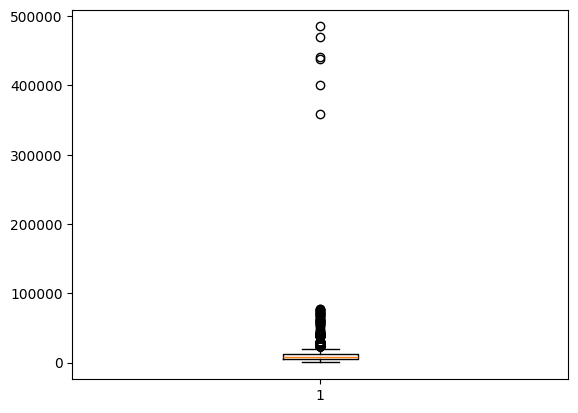

In [ ]:
plt.boxplot(dados['SALARIO'])

In [ ]:
Q1 = dados['SALARIO'].quantile(0.25)
Q1

4751.5

In [ ]:
Q3 = dados['SALARIO'].quantile(0.75)
Q3

11794.5

In [ ]:
IQR = Q3 - Q1
IQR

7043.0

In [ ]:
lim_superior = Q3 + (1.5 * IQR)
lim_superior

22359.0

In [ ]:
lim_inferior = Q1 - (1.5 * IQR)
lim_inferior

-5813.0

In [ ]:
dados['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


In [ ]:
media_salario = dados['SALARIO'].mean()
media_salario

10517.53348162023

In [ ]:
desvio_salario = dados['SALARIO'].std()
desvio_salario

18096.210989118474

In [ ]:
limite_superior = media_salario + (3*desvio_salario)
limite_superior

64806.16644897565

In [ ]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


In [ ]:
media_30_40 = dados[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_30_40

39002.19402985075

In [ ]:
dados.loc[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']>limite_superior), 'SALARIO']

,SALARIO
2053,470454.0
2257,358966.0
3201,441190.0


In [ ]:
dados.loc[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']>limite_superior), 'SALARIO'] = media_30_40

In [ ]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [ ]:
dados[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()

53127.846153846156

In [ ]:
media_maior_40 = dados[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()

In [ ]:
dados.loc[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO']>limite_superior), 'SALARIO']

,SALARIO
405,66592.0
443,71148.0
774,400212.0
1265,76740.0
2211,70040.0
2662,70088.0
2945,72164.0
2979,73217.0
3016,485191.0
3105,75272.0


In [ ]:
dados.loc[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO']>limite_superior), 'SALARIO']  = media_maior_40

In [ ]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


{'whiskers': [<matplotlib.lines.Line2D at 0x7b4bc4765ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b4bc48bbc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b4bc4765b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7b4bc48bbbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b4bc48bbc40>],
 'means': []}

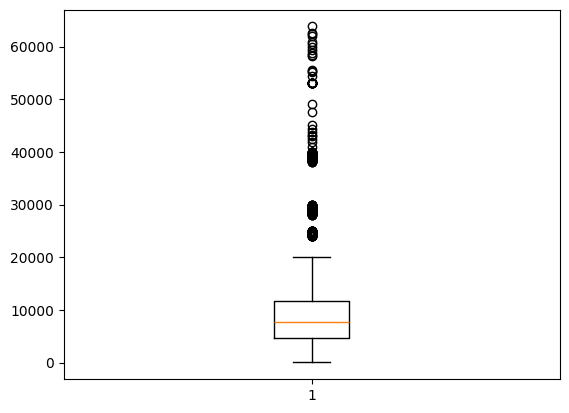

In [ ]:
plt.boxplot(dados['SALARIO'])

# Distribuição amostral e Intervalo de confiança

In [ ]:
salarios = dados['SALARIO']
salarios

,SALARIO
0,11194.0
1,4695.0
2,14202.0
3,15463.0
4,7733.0
...,...
4266,4329.0
4267,3758.0
4268,19607.0
4269,989.0


In [ ]:
media_amostral = np.mean(salarios)
media_amostral

9904.390109813306

In [ ]:
desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579343

In [ ]:
nivel_confianca = 0.95

In [ ]:
tamanho_amostra = len(salarios)
tamanho_amostra

4271

In [ ]:
erro_padrao = stats.sem(salarios) #divide a tabela de salários em amostras
erro_padrao

127.11109872023638

In [ ]:
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra-1, loc=media_amostral, scale=erro_padrao)

In [ ]:
intervalo_confianca

(9655.186295869078, 10153.593923757535)

In [ ]:
nivel_confianca2 = 0.90

In [ ]:
intervalo_confianca2 = stats.t.interval(nivel_confianca2, tamanho_amostra-1, loc=media_amostral, scale=erro_padrao)

In [ ]:
intervalo_confianca2

(9695.2655879745, 10113.514631652113)

# Featuring engineering

In [ ]:
def preencher_nivel(gestor, nivel):
  if gestor == 1:
    return "Pessoa gestora"
  else:
    return nivel

In [ ]:
dados['NOVO_NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)

In [ ]:
dados['NOVO_NIVEL'].value_counts()

,count
NOVO_NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa gestora,713


In [ ]:
dados['NIVEL']

,NIVEL
0,Júnior
1,NaN
2,Pleno
3,Sênior
4,Pleno
...,...
4266,Pleno
4267,Pleno
4268,NaN
4269,Júnior


In [ ]:
pd.get_dummies(dados, columns=['NIVEL'])

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,CARGO COMO GESTOR,CARGO ATUAL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO,NOVO_NIVEL,NIVEL_Júnior,NIVEL_Pleno,NIVEL_Sênior
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.000000,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,DBA/Administrador de Banco de Dados,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0,Júnior,True,False,False
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.000000,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Supervisor/Coordenador,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0,Pessoa gestora,False,False,False
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.000000,50-54,Masculino,Branca,Não,NaN,NaN,True,...,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0,Pleno,False,True,False
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,Cientista de Dados/Data Scientist,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0,Sênior,False,False,True
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.000000,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0,Pleno,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,Analista de Dados/Data Analyst,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0,Pleno,False,True,False
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0,Pleno,False,True,False
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Gerente/Head,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0,Pessoa gestora,False,False,False
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,20.205479,17-21,Masculino,Branca,Não,NaN,NaN,True,...,NaN,Outra Opção,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0,Júnior,True,False,False


In [ ]:
dados = pd.get_dummies(dados, columns=['NIVEL'])

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior'],
      dtype='object')

In [ ]:
def determinar_geracao(idade):
  if 39 < idade <= 58:
    return "Geração X"
  elif 29 < idade <= 39:
    return "Millenial"
  elif 13 < idade <= 29:
    return "Geração Z"
  else:
    return "Outra Geração"

In [ ]:
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [ ]:
dados['GERACAO'].value_counts()

,count
GERACAO,
Geração Z,1999
Millenial,1761
Geração X,511


In [ ]:
dados2 = pd.read_excel("/content/drive/MyDrive/ProgramariaAnaliseDados/Planilha_Aula_parte2.xlsx")

In [ ]:
dados2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [ ]:
dados.merge(dados2, on='ID', how='left')

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.000000,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.000000,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.000000,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.000000,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,"Sim, fui aprovado e mudei de emprego",Não estou buscando e não pretendo mudar de emp...,"Remuneração/Salário, Benefícios, Flexibilidade...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL
4269,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,"Ambient

In [ ]:
dados = dados.merge(dados2, on='ID', how='left')

In [ ]:
dados.columns


Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [ ]:
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [ ]:
dados['Em busca'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)

In [ ]:
dados['Em busca'].value_counts()

,count
Em busca,
False,2332
True,1364


In [ ]:
dados['Aberto a oportunidades'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)

In [ ]:
dados['Aberto a oportunidades'].value_counts()

,count
Aberto a oportunidades,
False,2342
True,1354


# Correlação

In [ ]:
correlacao_continua = dados['IDADE'].corr(dados['SALARIO'])
correlacao_continua

0.2902441968622099

In [ ]:
def cramer_coeficiente(coluna1, coluna2):
  #calcular tabela cruzada
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer



In [ ]:
cramer_coeficiente(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])

0.04499106580480143

In [ ]:
cramer_coeficiente(dados['GENERO'], dados['NIVEL DE ENSINO'])

0.076119232802818

In [ ]:
tabela_cruzada = pd.crosstab(dados['NIVEL DE ENSINO'], dados['COR/RACA/ETNIA'])
tabela_cruzada

COR/RACA/ETNIA,Amarela,Branca,Indígena,Outra,Parda,Prefiro não informar,Preta
NIVEL DE ENSINO,,,,,,,
Doutorado ou Phd,7,127,0,0,50,1,6
Estudante de Graduação,15,365,2,0,178,2,51
Graduação/Bacharelado,50,999,4,6,333,14,104
Mestrado,14,355,2,3,113,1,33
Não tenho graduação formal,2,65,0,1,33,0,9
Prefiro não informar,0,8,0,0,3,1,0
Pós-graduação,40,827,3,7,344,7,88


In [ ]:
np.array(tabela_cruzada)

array([[  7, 127,   0,   0,  50,   1,   6],
       [ 15, 365,   2,   0, 178,   2,  51],
       [ 50, 999,   4,   6, 333,  14, 104],
       [ 14, 355,   2,   3, 113,   1,  33],
       [  2,  65,   0,   1,  33,   0,   9],
       [  0,   8,   0,   0,   3,   1,   0],
       [ 40, 827,   3,   7, 344,   7,  88]])

In [ ]:
dados.to_csv('/content/drive/MyDrive/ProgramariaAnaliseDados/minha_analise_dados.csv', index=False)

# Conectando SQL com Pandas

In [ ]:
import sqlite3

In [ ]:
conexao = sqlite3.connect('/content/drive/MyDrive/ProgramariaAnaliseDados/status_brasil')

In [ ]:
query = "SELECT * FROM Municipios_Brasil WHERE Cidade = 'Água Branca';"
query

"SELECT * FROM Municipios_Brasil WHERE Cidade = 'Água Branca';"

In [ ]:
pd.read_sql(query, con=conexao)

,Cidade,Estado,Regiao,municipio_ID
0,Água Branca,AL,Nordeste,23
1,Água Branca,PB,Nordeste,2558
2,Água Branca,PI,Nordeste,2967


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/ProgramariaAnaliseDados/minha_analise_dados.csv')

In [ ]:
lista_estados = list(dados['UF ONDE MORA'].unique())
lista_estados

['DF',
 'PA',
 'MG',
 'CE',
 'SP',
 'RS',
 'BA',
 'RJ',
 'MS',
 'PB',
 'MT',
 'PR',
 'ES',
 nan,
 'SC',
 'PE',
 'RN',
 'SE',
 'AL',
 'GO',
 'MA',
 'AM',
 'PI']

In [ ]:
query = '''SELECT Municipios_Brasil.Estado, AVG(Municipio_Status.renda)
        FROM Municipios_Brasil INNER JOIN Municipio_Status ON
        Municipios_Brasil.municipio_ID = Municipio_Status.municipio_ID
        WHERE Municipios_Brasil.Estado IN ({})
        GROUP BY  Municipios_Brasil.Estado;'''.format(','.join(['?' for _ in lista_estados]))

In [ ]:
pd.read_sql(query, con=conexao, params = lista_estados )

,Estado,AVG(Municipio_Status.renda)
0,AL,0.548363
1,AM,0.545113
2,BA,0.574805
3,CE,0.559293
4,DF,0.863000
5,ES,0.680628
6,GO,0.683980
7,MA,0.531664
8,MG,0.652008
9,MS,0.687846


In [ ]:
estados_renda = pd.read_sql(query, con=conexao, params = lista_estados)

In [ ]:
dados.rename(columns={'UF ONDE MORA': 'Estado'}, inplace=True)

In [ ]:
dados.merge(estados_renda, on='Estado', how='left')

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,Em busca,Aberto a oportunidades,AVG(Municipio_Status.renda)
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.000000,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,0.863000
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.000000,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,0.572357
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.000000,50-54,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,0.863000
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True,0.652008
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.000000,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,0.572357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Benefícios, Flexibilidade...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL,False,False,0.716571
4269,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Ambiente e clima de trabalho, Plano de carreir...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,"SQL, Python",False,False,0.652008
4270,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.000000,25-29,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Ambiente e clima de traba...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e...",Gestor,NaN,False,True,0.716571
4271,4269,00xu7yujd7s57emj00xu7y0c3njix3de,20.205479,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% presencial,V

In [ ]:
dados = dados.merge(estados_renda, on='Estado', how='left')

In [ ]:
correlacao_renda_salarios = dados['SALARIO'].corr(dados['AVG(Municipio_Status.renda)'])
correlacao_renda_salarios

0.12083384881429463

# Visualização de dados

In [ ]:
dados['GENERO'].value_counts()

,count
GENERO,
Masculino,3194
Feminino,1058
Prefiro não informar,21


In [ ]:
genero_counts = dados['GENERO'].value_counts()

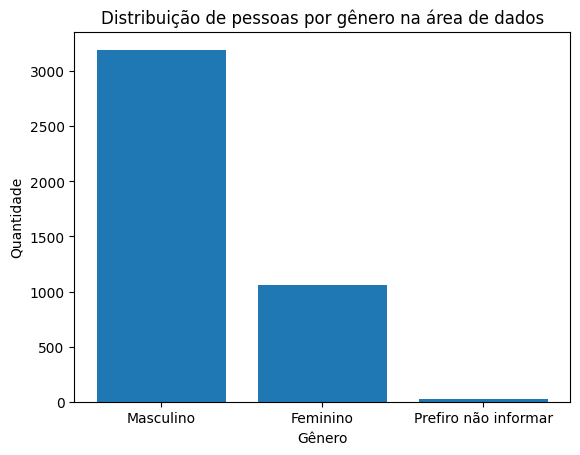

In [ ]:
plt.figure()
plt.bar(height = genero_counts.values, x = genero_counts.index)
plt.title("Distribuição de pessoas por gênero na área de dados")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.show()

<ipython-input-161-898273241d0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x='GENERO', palette = 'pastel')


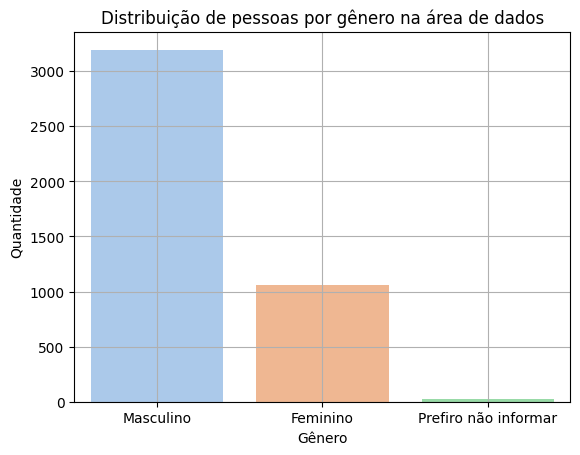

In [ ]:
plt.figure()
sns.countplot(data=dados, x='GENERO', palette = 'pastel')
plt.title("Distribuição de pessoas por gênero na área de dados")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.grid(True)
plt.show()

In [ ]:
salario_por_idade = dados.groupby('IDADE')['SALARIO'].mean()
salario_por_idade

,SALARIO
IDADE,
18.000000,4230.307692
19.000000,4519.590909
20.000000,5004.272727
20.205479,3536.000000
21.000000,4578.737179
22.000000,4394.689815
23.000000,5602.406897
24.000000,6151.622449
25.000000,7616.392336


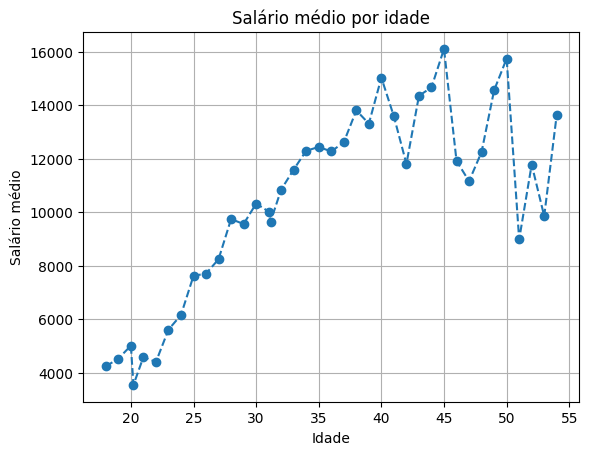

In [ ]:
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values, marker='o', linestyle='--')
plt.title("Salário médio por idade")
plt.xlabel("Idade")
plt.ylabel("Salário médio")
plt.grid(True)
plt.show()

In [ ]:
fig = px.line(salario_por_idade.reset_index(), x='IDADE', y='SALARIO', title="Salário médio por idade", markers=True)
fig.show()


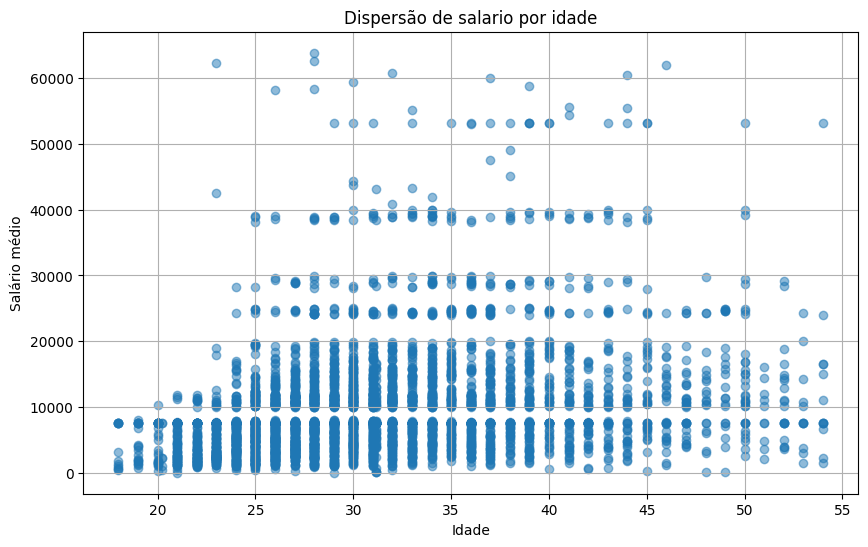

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dados['IDADE'], dados['SALARIO'], alpha=0.5)
plt.title("Dispersão de salario por idade")
plt.xlabel("Idade")
plt.ylabel("Salário médio")
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(dados, x='IDADE', y='SALARIO', title="Dispersão de salario por idade", trendline='ols')
fig.show()